<a href="https://colab.research.google.com/github/KrushnaTaur/ML-Practice/blob/main/ML_Lab_Experiments/ML_Experiment11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 11

In [ ]:
# --------------------------------------------------
# 🧩 Step 1: Import Libraries
# --------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# --------------------------------------------------
# 🧩 Step 2: Load Dataset
# --------------------------------------------------
file_path = "/content/Student_Dataset_Cleaned (3).csv"  # your cleaned dataset path
df = pd.read_csv(file_path)

print("✅ Dataset Loaded Successfully!")
print(df.shape)
df.head()

✅ Dataset Loaded Successfully!
(4424, 33)


,Marital_status,Daytime_evening_attendance_,Previous_qualification,Previous_qualification_grade_,Mother_s_qualification,Father_s_qualification,Mother_s_occupation,Father_s_occupation,Admission_grade,Displaced,...,Curricular_units_2nd_sem_enrolled_,Curricular_units_2nd_sem_evaluations_,Curricular_units_2nd_sem_approved_,Curricular_units_2nd_sem_without_evaluations_,Unemployment_rate,Inflation_rate,GDP,Target,Overall_Performance,Financial_Stability_Score
0,0.693147,713.434901,0.693147,122.0,19,12,1.459736,1.829314,127.3,1,...,0,0,0,0.0,10.8,1.4,1.74,1,7.137500,354.933348
1,0.693147,713.434901,0.693147,160.0,1,3,1.181467,1.204206,142.5,1,...,6,6,6,0.0,13.9,-0.3,0.79,0,13.833333,0.000000
2,0.693147,713.434901,0.693147,122.0,37,37,1.774292,1.829314,124.8,1,...,6,0,0,0.0,10.8,1.4,1.74,1,7.137500,0.000000
3,0.693147,713.434901,0.693147,122.0,38,37,1.459736,1.204206,119.6,1,...,6,10,5,0.0,9.4,-0.8,-3.12,0,12.914286,354.933348
4,1.098612,0.000000,0.693147,100.0,37,38,1.774292,1.829314,141.5,0,...,6,6,6,0.0,13.9,-0.3,0.79,0,12.666667,354.933348


In [ ]:
# --------------------------------------------------
# 🧩 Step 3: Encode Categorical Columns
# --------------------------------------------------
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("🔢 Label Encoding Completed.")


🔢 Label Encoding Completed.


In [ ]:
# --------------------------------------------------
# 🧩 Step 4: Split Features and Target
# --------------------------------------------------
y = df['Target']  # target column name (case-sensitive)
X = df.drop('Target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Data Ready for Modeling.")


✅ Data Ready for Modeling.


In [ ]:
# --------------------------------------------------
# 🧩 Step 5: Define Base Models
# --------------------------------------------------
base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('nb', GaussianNB()),
    ('dt', DecisionTreeClassifier(max_depth=6, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]


In [ ]:
# --------------------------------------------------
# 🧩 Step 6: Define Meta Model (Final Estimator)
# --------------------------------------------------
meta_model = LogisticRegression(max_iter=500)

# Create the stacking classifier
stack_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)


In [ ]:
# --------------------------------------------------
# 🧩 Step 7: Train the Stacking Model
# --------------------------------------------------
stack_model.fit(X_train, y_train)

y_pred_stack = stack_model.predict(X_test)
acc_stack = accuracy_score(y_test, y_pred_stack)

print(f"🎯 Stacking Ensemble Accuracy: {acc_stack * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_stack))


🎯 Stacking Ensemble Accuracy: 88.14%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       601
           1       0.87      0.74      0.80       284

    accuracy                           0.88       885
   macro avg       0.88      0.84      0.86       885
weighted avg       0.88      0.88      0.88       885



/tmp/ipython-input-1390317487.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='mako')


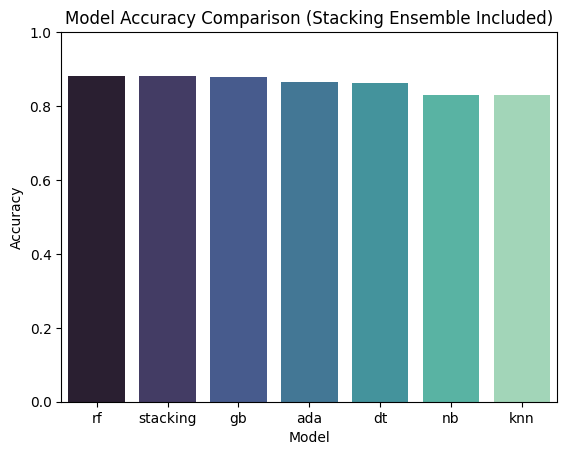

      Model  Accuracy
3        rf  0.881356
6  stacking  0.881356
5        gb  0.877966
4       ada  0.865537
2        dt  0.861017
1        nb  0.830508
0       knn  0.829379


In [ ]:
# --------------------------------------------------
# 🧩 Step 8: Compare with Individual Models
# --------------------------------------------------
model_results = []

for name, model in base_models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    model_results.append((name, acc))

# Add stacking model result
model_results.append(('stacking', acc_stack))

# Create DataFrame
results_df = pd.DataFrame(model_results, columns=['Model', 'Accuracy'])
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)

sns.barplot(x='Model', y='Accuracy', data=results_df, palette='mako')
plt.title("Model Accuracy Comparison (Stacking Ensemble Included)")
plt.ylim(0, 1)
plt.show()

print(results_df)


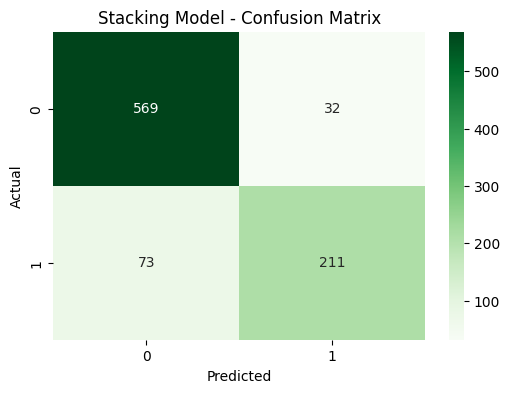

In [ ]:
# --------------------------------------------------
# 🧩 Step 9: Confusion Matrix for Stacking Model
# --------------------------------------------------
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_stack), annot=True, fmt='d', cmap='Greens')
plt.title("Stacking Model - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
